# Training StyleGAN - CIFAR10

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.utils import make_grid

import numpy as np
import matplotlib.pyplot as plt

In [2]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)

cuda


In [3]:
torch.manual_seed(0)
np.random.seed(0)

In [4]:
BATCH_SIZE = 32
LR = 5e-5
NUM_EPOCHES = 40
CRIT_REPEATS = 5

## Preprocessing

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

In [6]:
trainset = datasets.CIFAR10('../data/CIFAR10/', download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

Files already downloaded and verified


## Model

In [7]:
from models.StyleGAN import StyleGAN_Generator, StyleGAN_Discriminator

In [8]:
in_channels = 128
out_channels = 3
hidden_channels = 512
z_dim = 64
mapping_hidden_size = 128
w_dim = 256
synthesis_layers = 4
kernel_size=3

in_size = 3
d_hidden_size = 16

g = StyleGAN_Generator(in_channels, out_channels, hidden_channels, z_dim, mapping_hidden_size, w_dim, synthesis_layers, kernel_size, device=DEVICE).to(DEVICE)
d = StyleGAN_Discriminator(in_size, d_hidden_size).to(DEVICE)
print(g)
print(d)

from utils.model import weights_init 

g = g.apply(weights_init)
d = d.apply(weights_init)

StyleGAN_Generator(
  (mapping_network): MappingNetwork(
    (mapping_network): Sequential(
      (0): Linear(in_features=64, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): ReLU()
      (4): Linear(in_features=128, out_features=128, bias=True)
      (5): ReLU()
      (6): Linear(in_features=128, out_features=128, bias=True)
      (7): ReLU()
      (8): Linear(in_features=128, out_features=128, bias=True)
      (9): ReLU()
      (10): Linear(in_features=128, out_features=256, bias=True)
    )
  )
  (synthesis_network): ModuleList(
    (0): SynthesisNetwork_Block(
      (injectnoise): InjectNoise()
      (convolution): Conv2d(128, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (adain): AdaIN(
        (normalize): InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (style_scale): Linear(in_features=256, out_features=512, bias=True)
        (style_shift): Line

In [9]:
for index, (real, _) in enumerate(trainloader):
    real = real.to(DEVICE)
    noise = torch.randn(real.size(0), z_dim).to(DEVICE)
    
    print("Input Image Dimensions: {}".format(real.size()))
    print("Noise Dimensions: {}".format(noise.size()))
    print("-"*100)
    
    fake = g(noise)
    pred = d(fake)
    
    print("Fake Output Dimensions: {}".format(fake.size()))
    print("Prediction Output Dimensions: {}".format(pred.size()))
    break

Input Image Dimensions: torch.Size([32, 3, 32, 32])
Noise Dimensions: torch.Size([32, 64])
----------------------------------------------------------------------------------------------------
Fake Output Dimensions: torch.Size([32, 3, 32, 32])
Prediction Output Dimensions: torch.Size([32, 1])


C:\Users\Udbhav Prasad\anaconda3\lib\site-packages\torch\nn\functional.py:3060: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "


## Training

In [10]:
from Loss_F.loss import W_Crit_Loss, W_Gen_Loss

w_crit_loss = W_Crit_Loss(10)
w_gen_loss = W_Gen_Loss()
g_optimizer = torch.optim.Adam(g.parameters(), lr=LR, betas=(0.5, 0.999))
d_optimizer = torch.optim.Adam(d.parameters(), lr=LR, betas=(0.5, 0.999))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 0


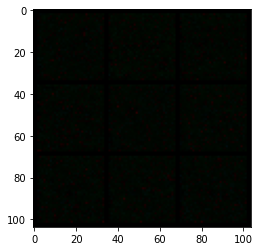

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 150


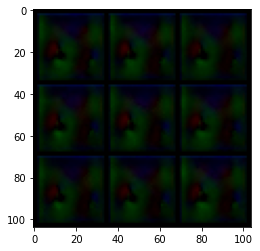

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 300


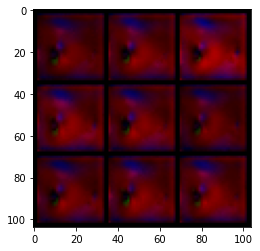

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 450


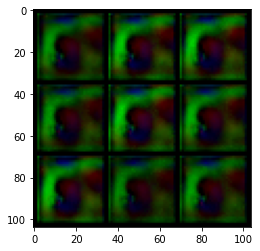

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 600


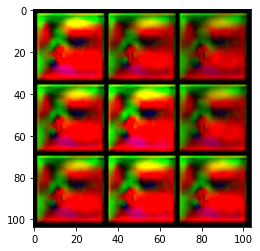

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 750


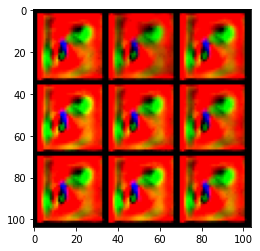

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 900


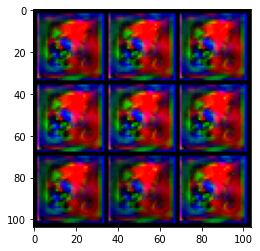

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1050


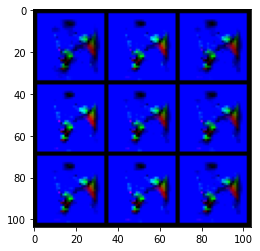

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1200


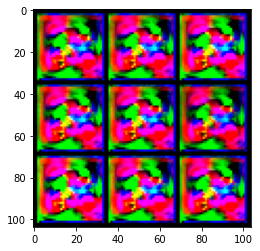

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1350


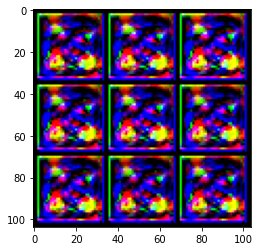

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1500


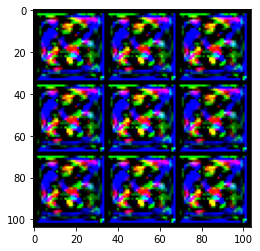

Epoch 1: Generator Loss: -0.760010926399567; Discriminator Loss: 4.552785005275061


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 0


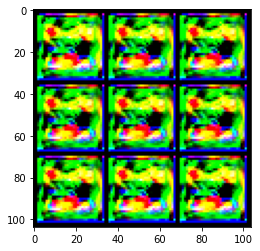

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 150


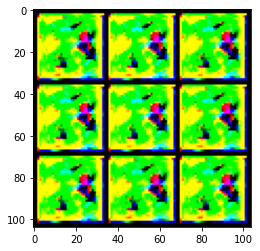

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 300


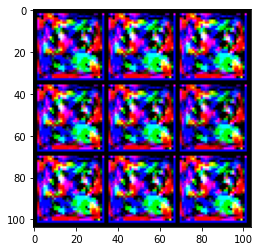

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 450


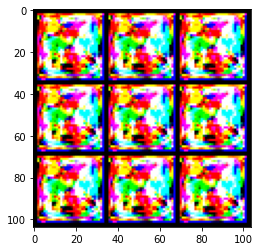

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 600


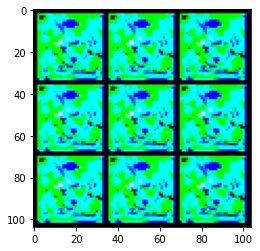

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 750


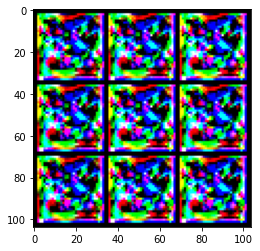

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 900


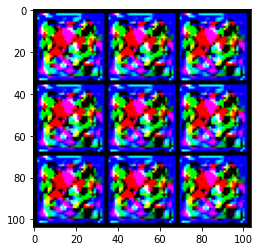

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1050


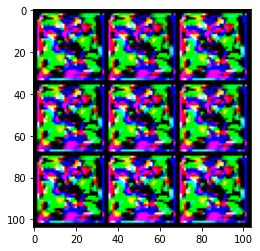

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1200


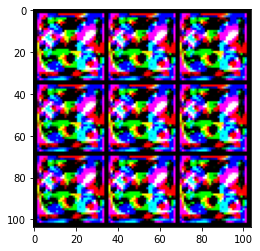

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1350


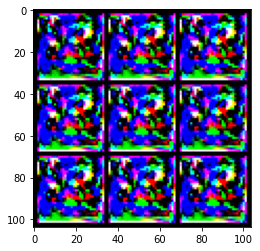

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1500


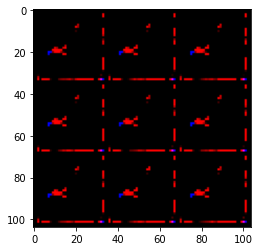

Epoch 2: Generator Loss: -2.017509235129933; Discriminator Loss: 7.5259427517862205


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 0


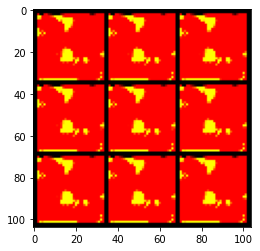

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 150


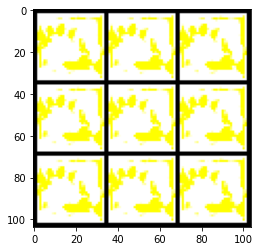

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 300


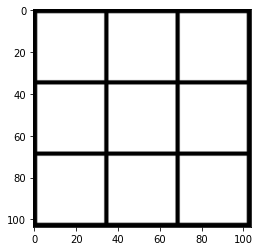

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 450


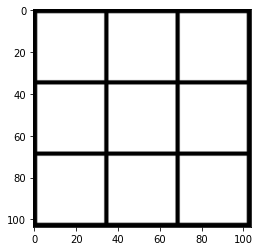

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 600


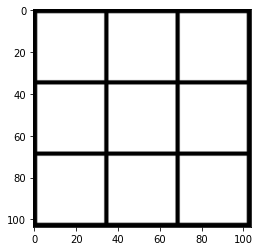

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 750


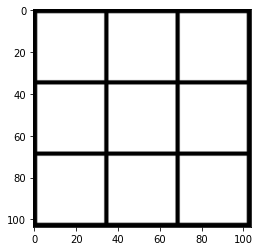

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 900


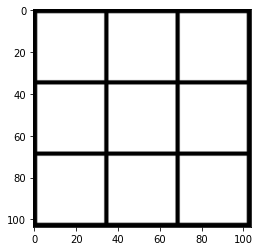

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1050


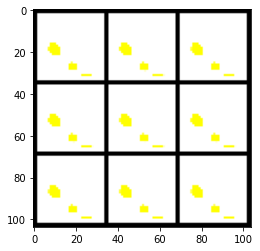

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1200


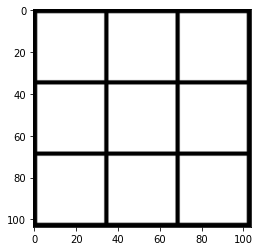

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1350


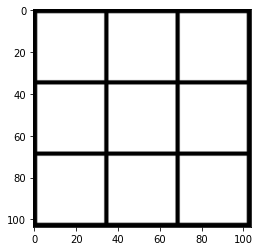

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1500


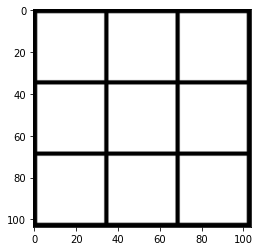

Epoch 3: Generator Loss: 0.35399194050151844; Discriminator Loss: 7.343870044303706


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 0


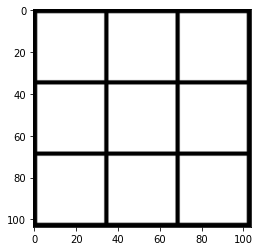

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 150


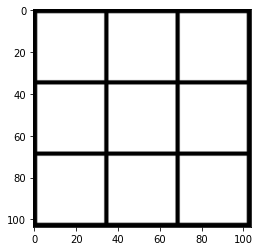

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 300


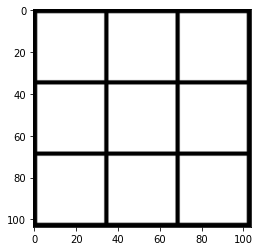

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 450


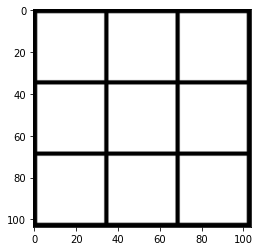

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 600


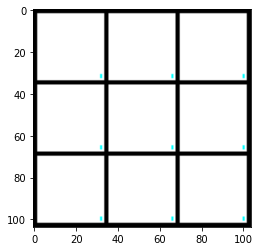

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 750


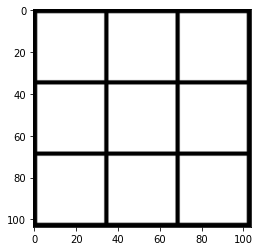

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 900


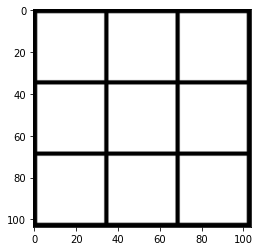

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1050


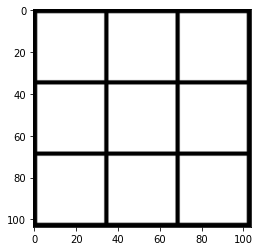

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1200


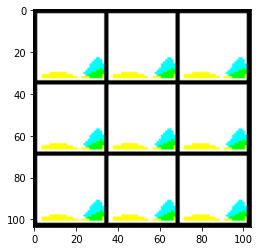

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1350


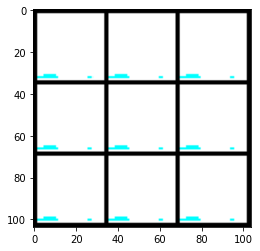

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1500


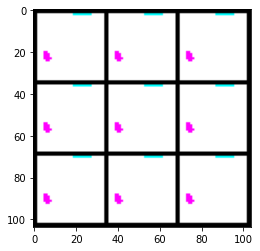

Epoch 4: Generator Loss: 2.168618797397888; Discriminator Loss: 4.742142182043249


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 0


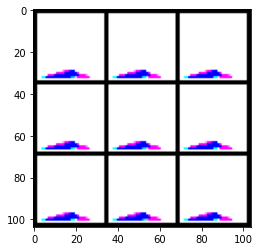

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 150


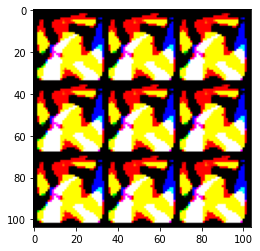

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 300


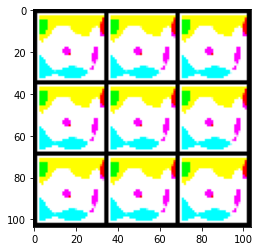

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 450


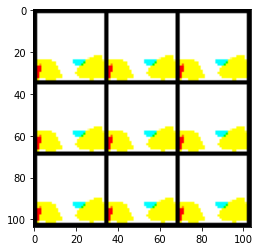

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 600


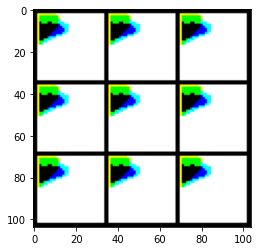

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 750


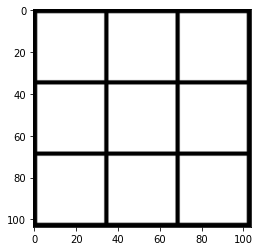

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 900


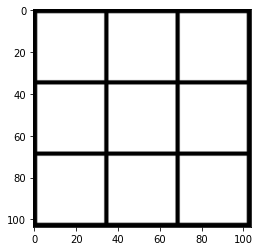

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1050


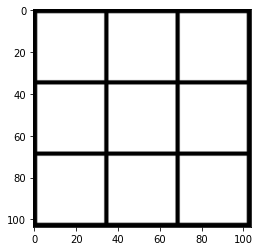

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1200


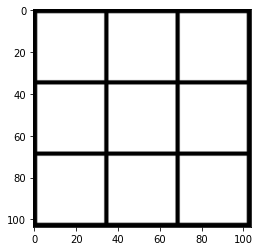

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1350


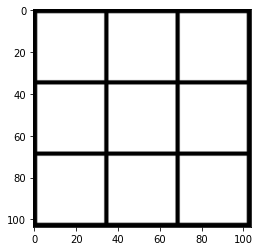

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1500


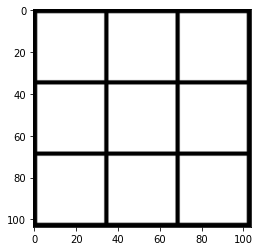

Epoch 5: Generator Loss: 5.0673365104068795; Discriminator Loss: 0.6921137974648154


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 0


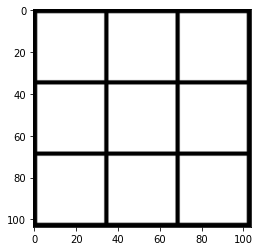

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 150


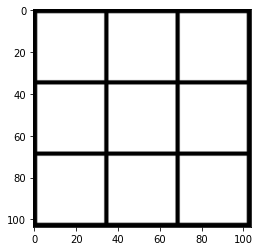

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 300


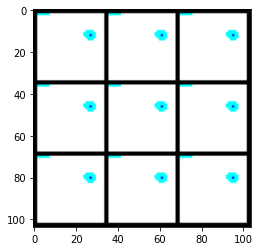

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 450


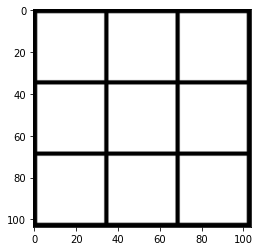

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 600


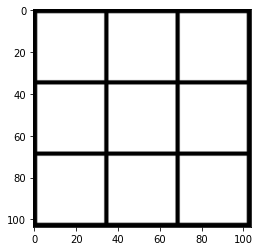

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 750


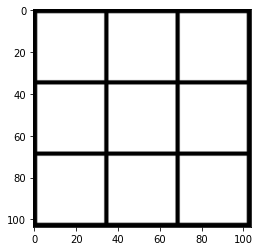

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 900


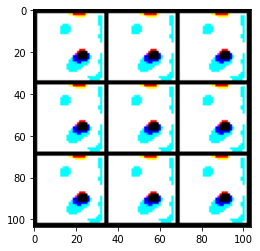

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1050


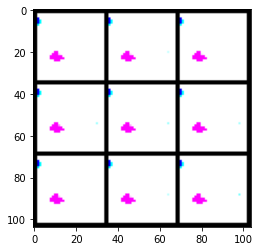

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1200


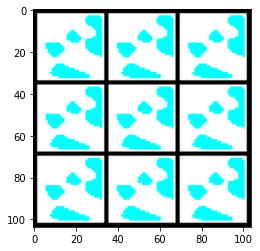

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1350


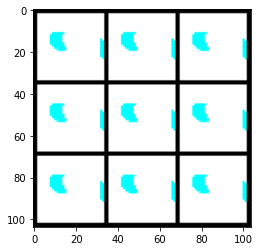

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1500


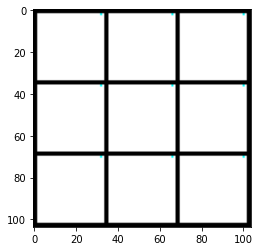

Epoch 6: Generator Loss: 3.971720714763198; Discriminator Loss: -10.527535830242705


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 0


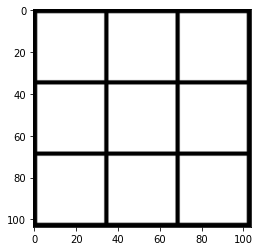

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 150


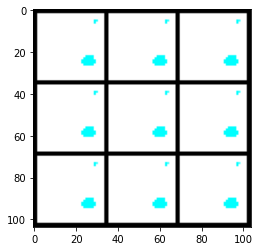

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 300


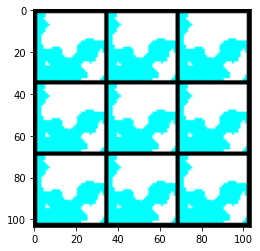

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 450


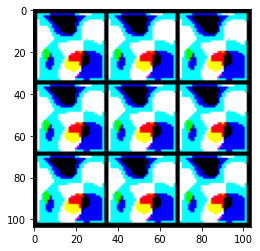

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 600


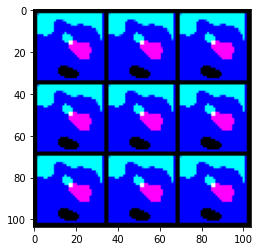

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 750


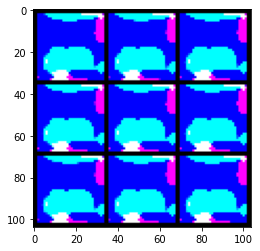

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 900


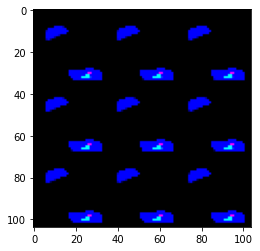

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1050


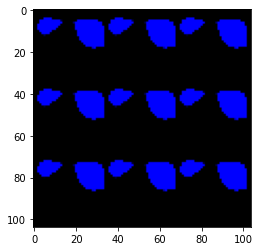

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1200


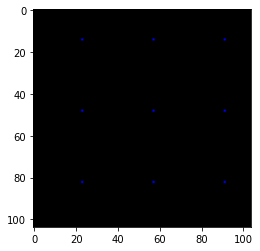

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1350


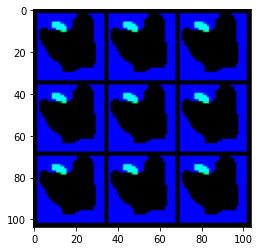

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1500


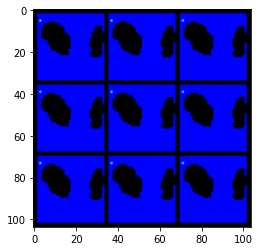

Epoch 7: Generator Loss: 0.016520412349197548; Discriminator Loss: -30.651869278684746


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 0


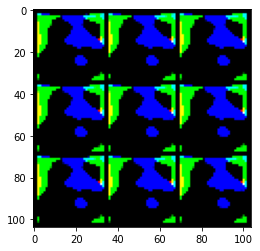

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 150


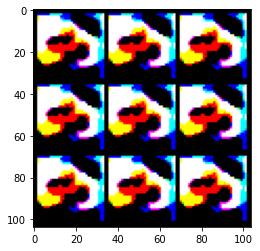

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 300


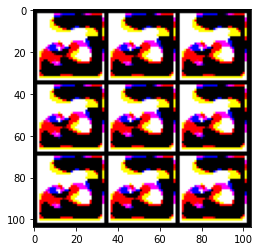

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 450


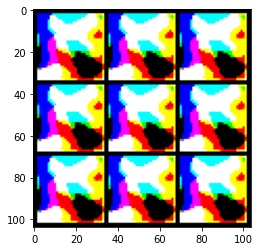

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 600


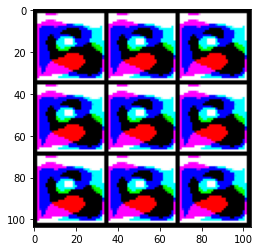

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 750


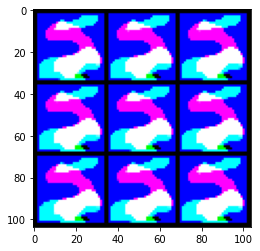

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 900


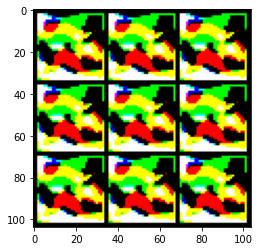

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1050


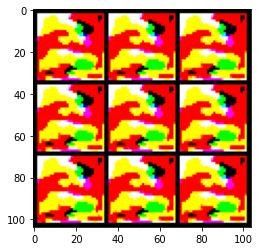

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1200


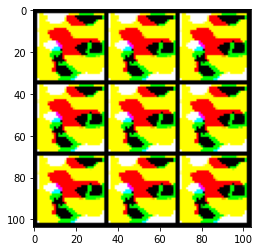

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1350


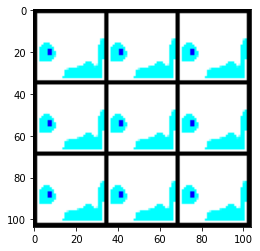

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1500


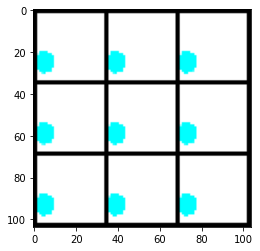

Epoch 8: Generator Loss: -45.052020626235574; Discriminator Loss: 16.338280311396552


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 0


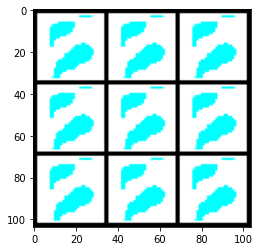

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 150


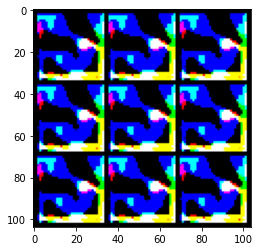

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 300


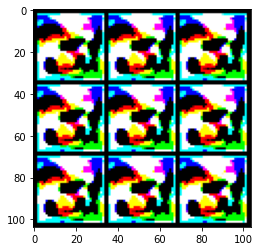

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 450


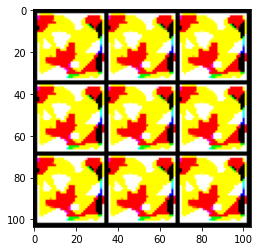

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 600


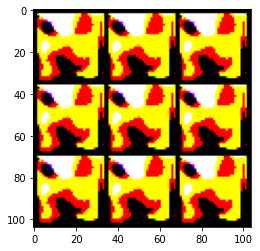

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 750


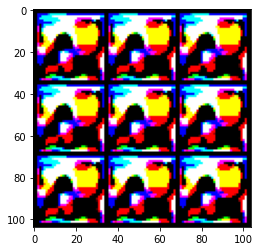

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 900


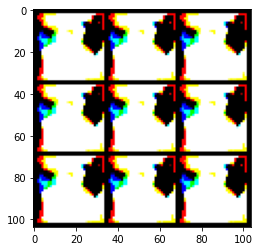

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1050


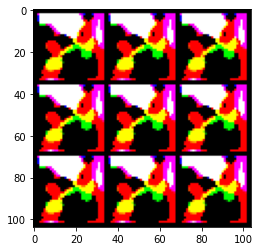

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1200


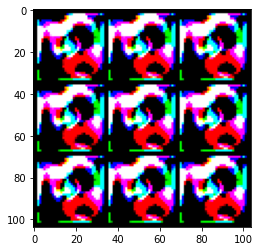

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1350


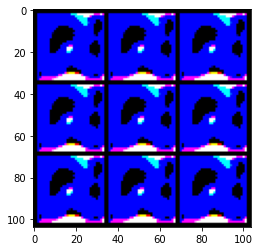

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1500


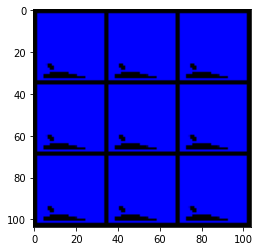

Epoch 9: Generator Loss: -26.10349626147015; Discriminator Loss: -1.159800723196981


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 0


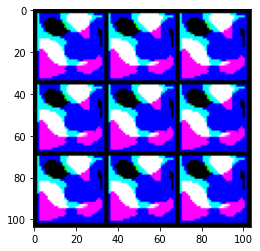

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 150


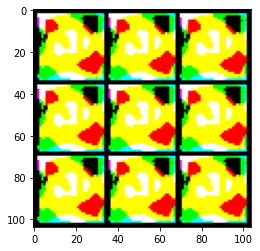

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 300


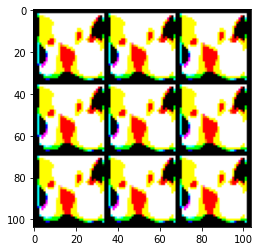

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 450


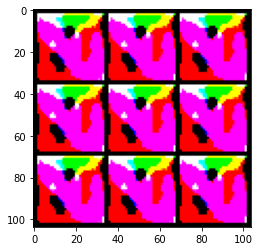

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 600


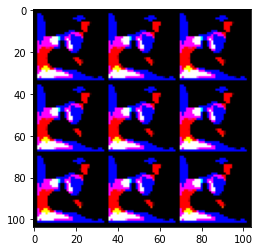

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 750


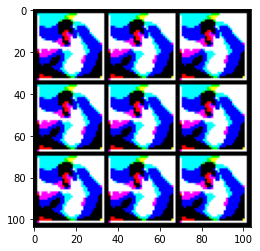

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 900


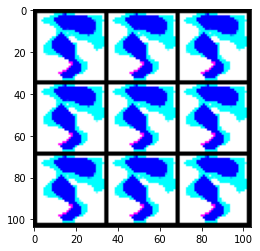

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1050


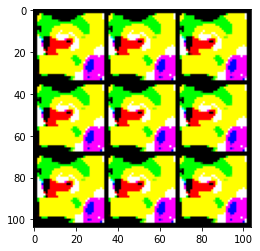

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1200


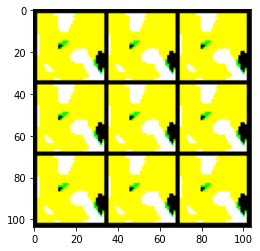

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1350


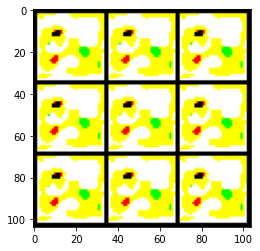

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1500


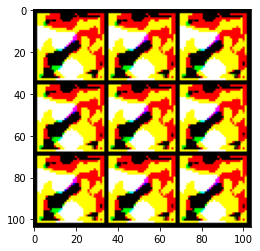

Epoch 10: Generator Loss: -25.5540899742378; Discriminator Loss: -6.995286403812822


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 0


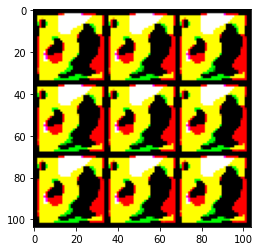

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 150


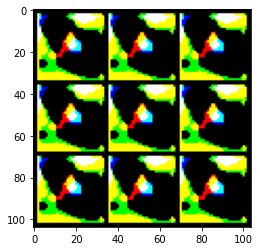

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 300


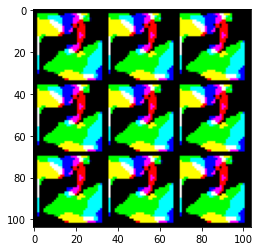

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 450


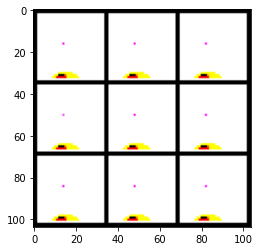

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 600


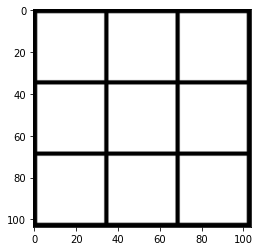

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 750


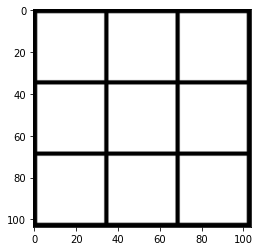

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 900


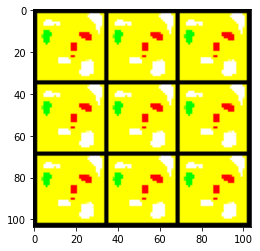

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1050


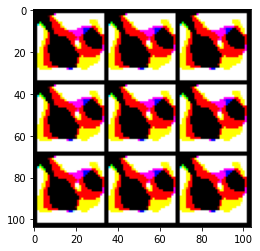

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1200


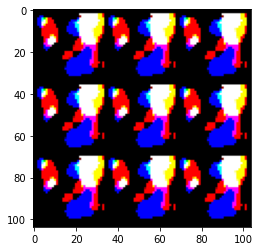

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1350


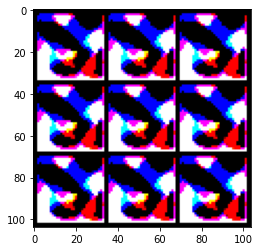

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1500


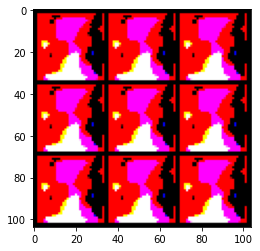

Epoch 11: Generator Loss: -6.225164487533705; Discriminator Loss: -40.08068771872554


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 0


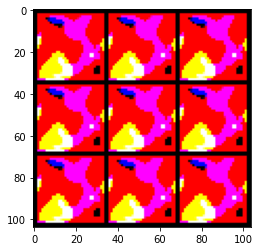

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 150


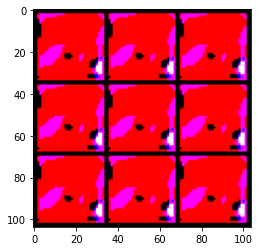

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 300


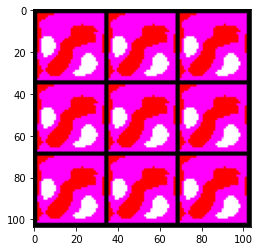

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 450


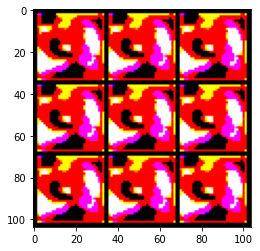

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 600


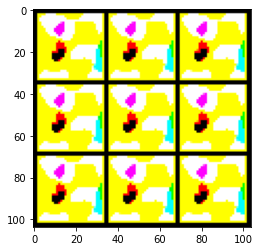

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 750


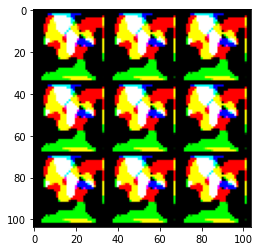

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 900


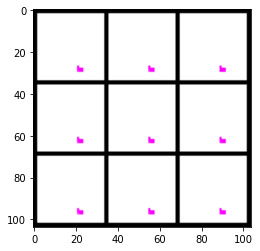

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1050


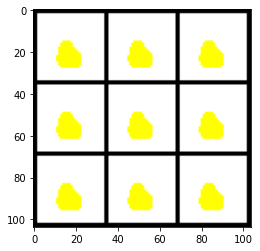

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1200


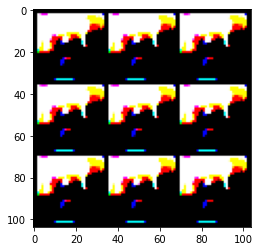

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1350


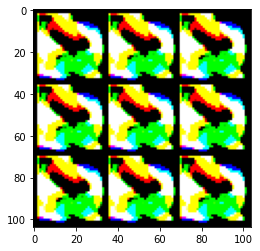

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1500


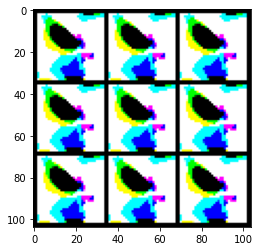

Epoch 12: Generator Loss: -38.586564134422666; Discriminator Loss: -21.78062436331261


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 0


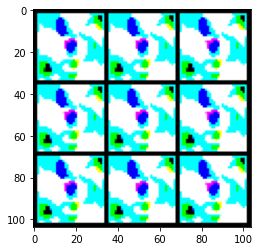

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 150


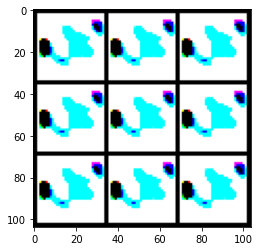

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 300


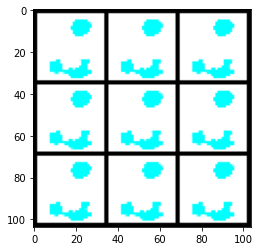

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 450


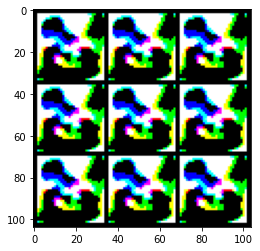

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 600


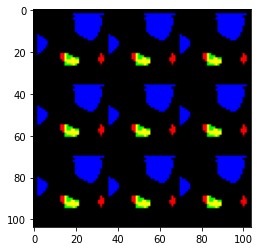

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 750


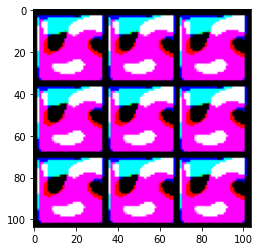

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 900


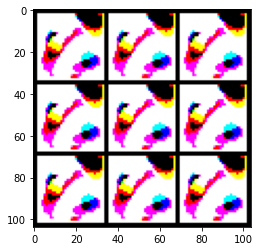

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1050


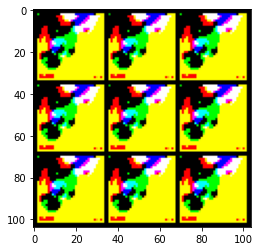

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1200


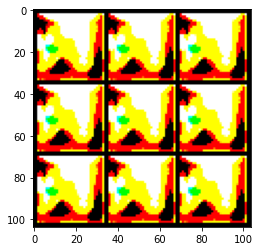

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1350


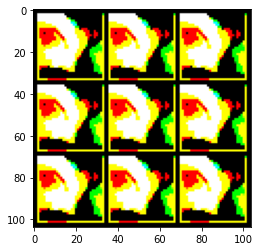

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1500


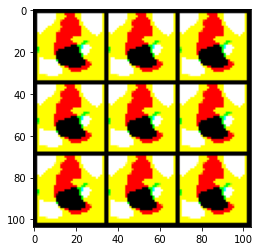

Epoch 13: Generator Loss: -34.89629154680482; Discriminator Loss: -22.77499469184218


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 0


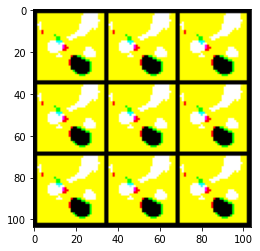

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 150


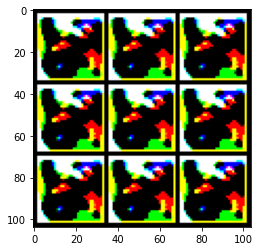

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 300


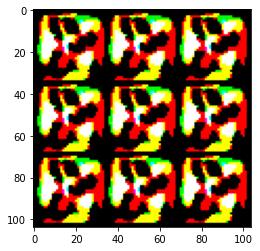

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 450


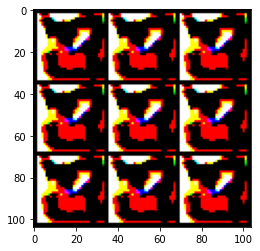

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 600


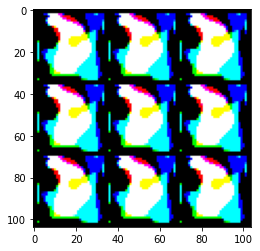

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 750


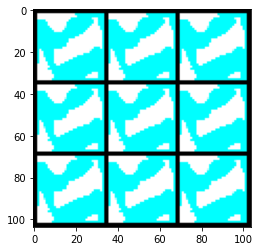

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 900


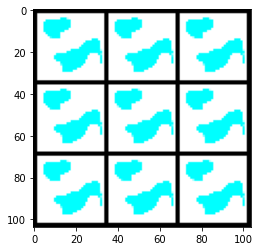

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1050


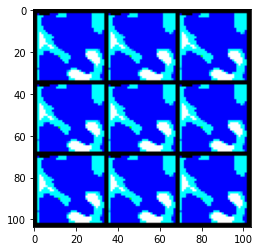

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Index 1200


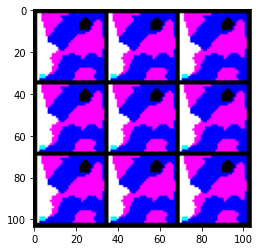

KeyboardInterrupt: 

In [11]:
from utils.train import Wasserstein_Crit_Train

loss_hist = {}
loss_hist["generator loss"] = []
loss_hist["discriminator loss"] = []

for epoch in range(1, NUM_EPOCHES+1):
    
    epoch_d_loss = 0
    epoch_g_loss = 0
    
    for index, (real, _) in enumerate(trainloader):
        b = real.size(0)
        real = real.to(DEVICE)
        
        loss = Wasserstein_Crit_Train(d, g, d_optimizer, w_crit_loss, CRIT_REPEATS, real, z_dim, device=DEVICE)
        epoch_d_loss += loss
        
        g_optimizer.zero_grad()
        noise = torch.randn(b, z_dim).to(DEVICE)
        fake = g(noise)
        pred = d(fake)
        
        g_loss = w_gen_loss(pred)
        g_loss.backward()
        epoch_g_loss += g_loss.item()
        g_optimizer.step()
        
        if index%150 == 0:
            g.eval()
            print("Index {}".format(index))
            noise = torch.randn(b, z_dim).to(DEVICE)
            fake = g(noise)
    
            images = fake.detach().to("cpu")
            images_grid = make_grid(images[:9], nrow=3)
            g.train()
            plt.imshow(images_grid.permute(1, 2, 0).squeeze())
            plt.show()
        
    epoch_g_loss /= len(trainloader)
    epoch_d_loss /= len(trainloader)
    
    loss_hist["generator loss"].append(epoch_g_loss)
    loss_hist["discriminator loss"].append(epoch_d_loss)
    
    print("Epoch {}: Generator Loss: {}; Discriminator Loss: {}".format(epoch, epoch_g_loss, epoch_d_loss))